# Figure 3
## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import FancyBboxPatch

## Code
Define figure dimensions:

In [2]:
fig_width = 3.25 # single column width
fig_width_2col = 2 * fig_width # double column width
fig_height = (3 / 4) * fig_width_2col # standard ratio

Define default plot settings:

In [3]:
rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

Define dictionary for the text boxes with background color and position parameters.

The positions are (min_time, max_time, min_length_scale, max_length_scale, color).

In [4]:
box_positions = {
    'Cycling\n& Storage': (3600 * 24 * 60, 3600 * 24 * 365, 0.06, 0.8, 'lightcoral'),
    'UHPC': (3600 * 24 * 14, 3600 * 24 * 56, 0.06, 0.8, 'lightcoral'),
    'Formation': (5 * 3600, 48 * 3600, 0.06, 0.8, 'lightgreen'),
    'EIS': (62, 3600, 0.06, 0.8, 'lightgreen'),
    'HiPot': (0.1, 58, 0.06, 0.8, 'lightgreen'),
    'Dissection': (3600 * 0.5, 3600 * 4, 1e-6, 1e-5, 'lightcoral'),
    'Cross-\nsection': (3600 * 2, 3600 * 10, 2e-7, 1e-6, 'lightcoral'),
    'Ultrasound': (2, 60, 1e-3, 1e-2, 'lightgreen'),
    'In-line\nvision': (0.1, 1, 2e-7, 1e-6, 'lightblue'),
    '2D\nX-ray\nimaging': (0.1, 1, 1e-5, 1e-4, 'lightblue'),
    '3D X-ray imaging (CT)': (2, 3600, 1e-5, 1e-4, 'lightgreen'),
}

Create function to add the boxes:

In [5]:
def add_boxes(ax, box_dict):
    for text, (min_x, max_x, min_y, max_y, color) in box_dict.items():
        ax.add_patch(plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, 
                                   facecolor=color, alpha=0.5, edgecolor='k'))
        x_pos = np.sqrt(min_x * max_x)  # Geometric mean for x position
        y_pos = np.sqrt(min_y * max_y)  # Geometric mean for y position
        ax.text(x_pos, y_pos, text, ha='center', va='center')

Add a large patch for "Full cell":

In [6]:
def add_full_cell_patch(ax, min_x, max_x, min_y, max_y):
    # Create a patch
    patch = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, 
                          facecolor='lightgrey', alpha=0.5, edgecolor='none')
    ax.add_patch(patch)
    # Add text annotation
    ax.text(2.8e7, 0.045, 'Full cell', ha='left', va='center', zorder=5)


Define ticks for the x and y axis:

In [7]:
# x-axis ticks
x_ticks_updated = [3.15e7, 2.6e6, 86400, 3600, 60, 1, 0.1]  # 'years' to 'seconds', base units of seconds
x_labels_updated = ['years', 'months', 'days', 'hours', 'minutes', 'seconds', '100 ms']

# y-axis ticks
y_ticks_updated = [1, 1e-3, 1e-6, 1e-9]  # 'm' to 'nm', base units of m
y_labels_updated = ['m', 'mm', 'μm', 'nm']

Plot!

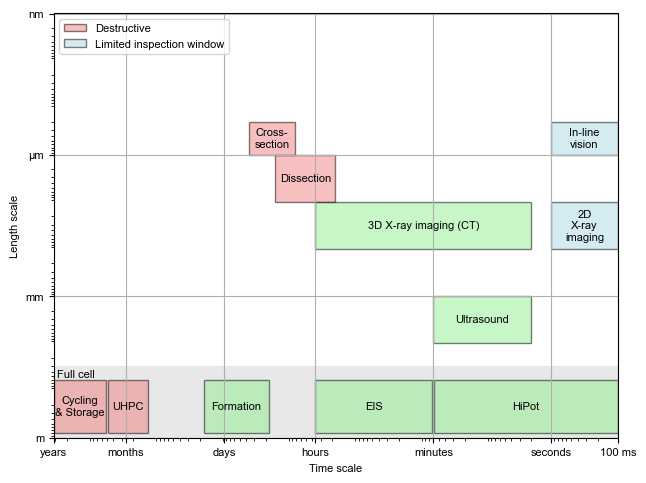

In [8]:
# Set up the plot with enclosed axes
fig, ax = plt.subplots(figsize=(fig_width_2col, fig_height))
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid()

# Set the tick labels
ax.set_xticks(x_ticks_updated)
ax.set_xticklabels(x_labels_updated)
ax.set_yticks(y_ticks_updated)
ax.set_yticklabels(y_labels_updated)

# Set the axis labels
ax.set_xlabel('Time scale')
ax.set_ylabel('Length scale')

# Invert the axes
ax.set_xlim(max(x_ticks_updated), min(x_ticks_updated))
ax.set_ylim(max(y_ticks_updated), min(y_ticks_updated))

# Add full cell patch (4cm-100cm is roughly the range of full cell sizes)
add_full_cell_patch(ax, min(x_ticks_updated), max(x_ticks_updated), 0.03, 1)

# Add the text boxes
add_boxes(ax, box_positions)

# Add the legend by making fake points
patch1 = plt.Rectangle((1e-3, 1000), 1e-10, 1e-10,
                       facecolor='lightcoral', alpha=0.5, edgecolor='k', label='Destructive')
patch2 = plt.Rectangle((1e-3, 1000), 1e-10, 1e-10,
                       facecolor='lightblue', alpha=0.5, edgecolor='k', label='Limited inspection window')
ax.add_patch(patch1)
ax.add_patch(patch2)
plt.legend(loc='upper left')

# Save the plot
plt.savefig("figures/fig3.pdf", dpi=300, bbox_inches="tight", format="pdf")